# Case 1. Heart Disease Classification
Kimmo Eemi Juhani Tolonen   
Last edited: 04.02.2018   
Cognitive Systems for Health Technology Applications   
Helsinki Metropolia University of Applied Sciences

### 1. Objectives
<br>
Purpose of this first case is learn to process data with Jupyter notebook and use it with libraries. I chose to use processed  data only for this assigment, because it is simpler to me than process raw data, considering my experiences with these kind of programming so far. <br> The aim of this assignment is to learn to read data from externals sources using panda’s iofunctions
and use keras.io dense neural networks to make an expert system to support in
diagnostic decision making.

### 2. Required libraries

In [284]:
# Import libraries which are needed in this case.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers

import itertools 
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

### 3. Data description and preprocessing

In [285]:
# Read 4 databases from website.

cleveland_pro = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
hungarian = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
longbeach = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
switzerland = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'

# Name columns from databases

colnames = ['age', 'sex', 'cp', 'tresbps', 'chol','fbs', 'restecg', 'thalach', 'exang',
'oldpeak', 'slope', 'ca', 'thal', 'num']

# Read data from datafile and make dataframe for each database.

# Cleveland
dfc = pd.read_csv(cleveland_pro,
                 names = colnames,
                 na_values = '?')

# Hungarian
dfh = pd.read_csv(hungarian,
                 names = colnames,
                 na_values = '?')

# Longbeach
dfl = pd.read_csv(longbeach,
                 names = colnames,
                 na_values = '?')

# Switzerland
dfs = pd.read_csv(switzerland,
                 names = colnames,
                 na_values = '?')


# Create one large frame from created dataframes.
df = [dfc, dfh, dfl, dfs]

df = pd.concat(df)

In [286]:
# Describe dataframe

df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [287]:
# Mean of each attribute from dataframe.

df.mean()

age         53.510870
sex          0.789130
cp           3.250000
tresbps    132.132404
chol       199.130337
fbs          0.166265
restecg      0.604575
thalach    137.545665
exang        0.389595
oldpeak      0.878788
slope        1.770867
ca           0.676375
thal         5.087558
num          0.995652
dtype: float64

In [288]:
# Sum of attributes from dataframe.

np.sum(~np.isnan(df))

age        920
sex        920
cp         920
tresbps    861
chol       890
fbs        830
restecg    918
thalach    865
exang      865
oldpeak    858
slope      611
ca         309
thal       434
num        920
dtype: int64

In [289]:
# Missing values

df = df.where(~np.isnan(df), df.mean(), axis = 'columns')

In [290]:
# Output value: 0 = normal, 1 = heart disease

labels = (df['num'] > 0).values

In [291]:
# Scale the attributes between min and max

df2 = (df - df.min())/(df.max() - df.min())

# Select all attributes that were measured without angiography

columns = ['age', 'sex', 'cp', 'tresbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope']

# Convert the data to numpy array

data = df2[columns].values

# Print out the data, so we can see that everything goes right.

print(data)

[[ 0.71  1.    0.   ...,  0.    0.56  1.  ]
 [ 0.8   1.    1.   ...,  1.    0.47  0.5 ]
 [ 0.8   1.    1.   ...,  1.    0.59  0.5 ]
 ..., 
 [ 0.9   1.    0.67 ...,  0.    0.48  0.5 ]
 [ 0.92  0.    0.67 ...,  0.    0.3   0.  ]
 [ 0.94  1.    0.33 ...,  0.    0.44  0.  ]]


In [292]:
# Size of data: Number of patients and number of columns.

data.shape

(920, 11)

In [293]:
#Correlation of dataframe df.

corr = df.corr()
print(corr)

              age       sex        cp   tresbps      chol       fbs   restecg  \
age      1.000000  0.056889  0.166245  0.235253 -0.084499  0.222810  0.212219   
sex      0.056889  1.000000  0.170392  0.001073 -0.193782  0.086096 -0.015608   
cp       0.166245  0.170392  1.000000  0.024297 -0.130656  0.038223  0.030991   
tresbps  0.235253  0.001073  0.024297  1.000000  0.088290  0.135650  0.096591   
chol    -0.084499 -0.193782 -0.130656  0.088290  1.000000  0.020493  0.114755   
fbs      0.222810  0.086096  0.038223  0.135650  0.020493  1.000000  0.128408   
restecg  0.212219 -0.015608  0.030991  0.096591  0.114755  0.128408  1.000000   
thalach -0.353471 -0.177135 -0.338742 -0.104616  0.226325 -0.048344  0.051980   
exang    0.194842  0.179209  0.406837  0.151857 -0.033110  0.025402  0.031590   
oldpeak  0.248082  0.102733  0.235681  0.160268  0.045498  0.047497  0.115498   
slope    0.119158  0.103178  0.158773  0.053894 -0.050685  0.067090 -0.012786   
ca       0.204139  0.062058 

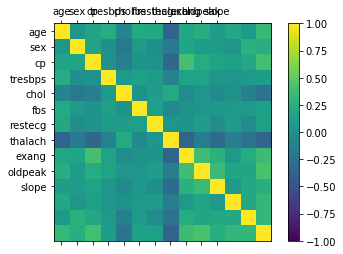

In [294]:
# Graphical plot of correlation

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colnames)
ax.set_yticklabels(colnames)
plt.show()

I have no idea why that plot looks like that. 

In [295]:
# Scale the data

min_max_scaler = preprocessing.MinMaxScaler()

data_scaled = min_max_scaler.fit_transform(data)

In [296]:
min_max_scaler.scale_, min_max_scaler.fit_transform(data)

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([[ 0.71,  1.  ,  0.  , ...,  0.  ,  0.56,  1.  ],
        [ 0.8 ,  1.  ,  1.  , ...,  1.  ,  0.47,  0.5 ],
        [ 0.8 ,  1.  ,  1.  , ...,  1.  ,  0.59,  0.5 ],
        ..., 
        [ 0.9 ,  1.  ,  0.67, ...,  0.  ,  0.48,  0.5 ],
        [ 0.92,  0.  ,  0.67, ...,  0.  ,  0.3 ,  0.  ],
        [ 0.94,  1.  ,  0.33, ...,  0.  ,  0.44,  0.  ]]))

In [297]:
# Split the data into training and validation sets

x_train, x_test, y_train, y_test = train_test_split(data_scaled, labels, test_size = 0.36)


### 4. Modeling and compilation

In [298]:
# Create the NeuralNetwork model and train it.

model = Sequential ()
model.add(Dense(64, activation = 'relu', input_dim = 11))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
             metrics = ['accuracy'])


### 5. Training and validation

In [299]:
# Training

N = 100 # number of epochs
h = model.fit(x_train, y_train, 
              verbose = 0,
              epochs = N,
             batch_size = 200,
             validation_data = (x_test, y_test))

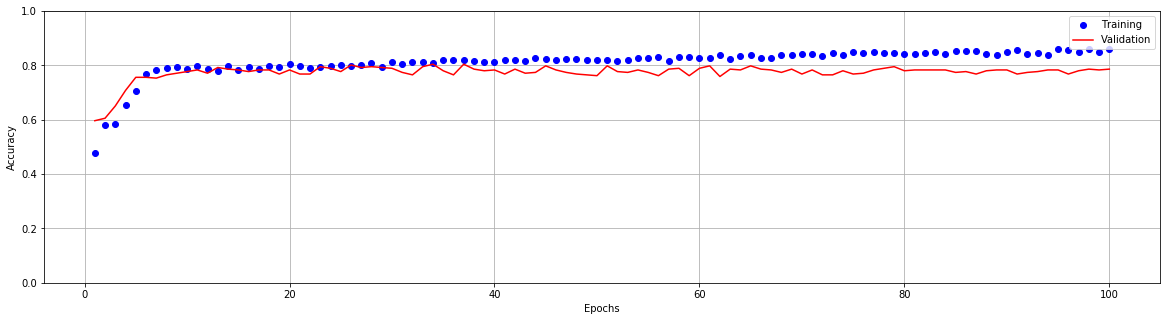

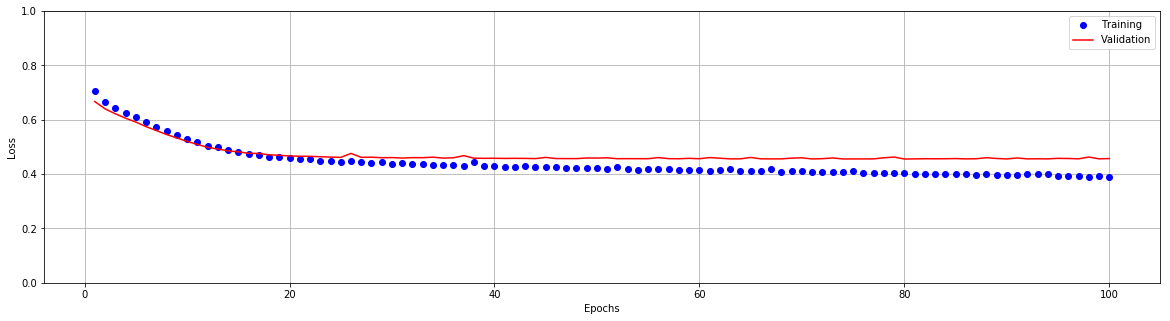

In [300]:
# Plot the results 
epochs = range(1, N + 1)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'r-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

### 6. Evaluation

In [301]:
#Test the model

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=200)
print('test acc:', test_acc)

332/332 [==============================] - 0s 36us/step
test acc: 0.786144567541


### 7. Results and Discussion

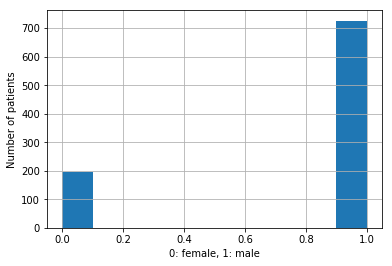

In [302]:
# Creates histogram from all databases of sex.

df2['sex'].hist(bins = 10)
plt.xlabel('0: female, 1: male')
plt.ylabel('Number of patients')
plt.show()

Above is histogram that shows how many of patients was female and how many was male.<br>
<br>
Results show that number of male participations were over three times higher than females participations. In fact this is heart disease database and it is most common on males than females.

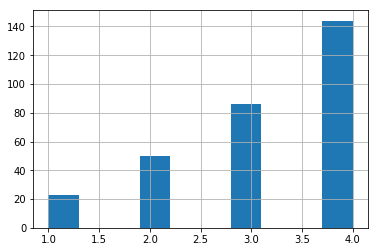

In [303]:
# Creates histogram from Cleveland data 'cp'.

dfc['cp'].hist(bins = 10)
plt.show()

Histogram above presents chest pain type ("cp") of patients from Cleveland data.<br> 
<br>Meaning of values: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic   
<br> 
There were most values of 4 in Cleveland data, which means that most of patients were asymptomatic.

In [304]:
# CONFUSION MATRIX

# Makes prediction y_pred

Y_pred = model.predict(x_test)

y_pred = np.argmax(Y_pred, axis=1)

y_pred = model.predict_classes(x_test)

# Give target names for classes

target_names = ['Class 1', 'Class 2']

print(classification_report(y_test, y_pred, target_names = target_names))
print(confusion_matrix(y_test, y_pred))


             precision    recall  f1-score   support

    Class 1       0.75      0.72      0.74       138
    Class 2       0.81      0.83      0.82       194

avg / total       0.79      0.79      0.79       332

[[100  38]
 [ 33 161]]


Normalized confusion matrix
[[ 0.72  0.28]
 [ 0.17  0.83]]


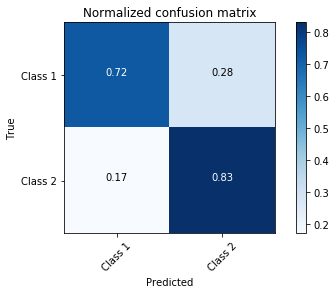

In [305]:
# Next code is copied from sklearn website. I did not find other way to do this plotting.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

# Function print and plots confusion matrix

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### I tried this confusion matrix thing and it left me confused. 
Majority of that code is taken from "http://scikit-learn.org". <br>
<br>
I don't understand really what result on below means. I named target_names to "Class 1" and "Class 2".<br>
I left confusion matrix in this report anyway, even though I did not get result what I wanted.

### 8. Conclusions
<br>
Case 1 is now done and I learned process data from databases with Jupyter notebook and use imports like pandas, sklearn, keras, numpy and matplotlib. I used processed data only for this assigment and did what I could with it. I learned to use those libraries and work with them little bit. <br>
<br>
I made couple simple graphical histograms from basic informations, like number of females and males. I made correlation matrix from dataframe and tried to make confusion matrix, it is what it is. I created neuralnetwork and trained it, just like we did at school this week. Testing the model gives about 0,8 accuracy.<br>
<br>

